$$PROJECT -TIME-SERIES-WEATHER-FORECAST$$

### In this project, you will create a short-term temperature forecast.

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
# from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [2]:
df = pd.read_csv('/home/mahmood/Documents/Spiced/ordinal-oregano-student-code/week_07/data/TG_STAID004563.txt',sep=",",skiprows=19,skipinitialspace=True)
df.head()

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0


### Exploring and Cleaning Data

In [3]:
df['Q_TG'].unique()

array([0, 9])

In [4]:
df.loc[df['DATE']==19451008]

,SOUID,DATE,TG,Q_TG
25482,127488,19451008,-9999,9


In [5]:

df.Q_TG[df.Q_TG==9].index
#calculating the mean of 2 years before and after the missing value
mean=(df[['TG']].iloc[24715:25315].mean()+df[['TG']].iloc[25511:26111].mean())/2
#impute the missing values
for q in df.Q_TG[df.Q_TG==9].index:
    df['TG'].iloc[q]=mean
    df['Q_TG'].iloc[q]=0


df['Q_TG'].unique()


/home/mahmood/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


array([0])

In [6]:
df['TG'] = df['TG'].apply(lambda x: x * 0.1)

In [7]:
df.loc[df['DATE']==19451008]

,SOUID,DATE,TG,Q_TG
25482,127488,19451008,7.685833,0


In [8]:
df=df.drop(['SOUID','Q_TG'],axis=1)
df['DATE'] = pd.to_datetime(df['DATE'],format='%Y%m%d')
df=df.set_index('DATE')
df

,TG
DATE,
1876-01-01,2.2
1876-01-02,2.5
1876-01-03,0.3
1876-01-04,-5.8
1876-01-05,-9.8
...,...
2022-01-27,4.4
2022-01-28,4.9
2022-01-29,5.8


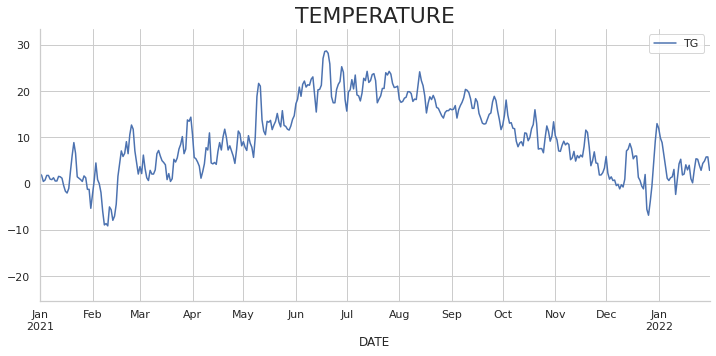

In [9]:
# Set figure size to (14,6)
plt.rcParams['figure.figsize'] = (12,5)
sns.set_theme(style='whitegrid')
#plot the data
df.plot()
plt.xlim('2021-01-01'	, '2022-01-31')
plt.title("TEMPERATURE", fontsize=22)

sns.despine()

### Analyzing Time Series

In [10]:
# create timestep variable to model the trend using Linear Regression

df['timestep'] = list(range(len(df)))
df.head()

,TG,timestep
DATE,,
1876-01-01,2.2,0
1876-01-02,2.5,1
1876-01-03,0.3,2
1876-01-04,-5.8,3
1876-01-05,-9.8,4


In [11]:
#Linear Regression
m = LinearRegression()
#timestep as X and map to y

X = df[['timestep']]
y = df['TG']
m.fit(X, y)
df['trend'] = m.predict(X)
df.head()

,TG,timestep,trend
DATE,,,
1876-01-01,2.2,0,8.516047
1876-01-02,2.5,1,8.516080
1876-01-03,0.3,2,8.516114
1876-01-04,-5.8,3,8.516147
1876-01-05,-9.8,4,8.516180


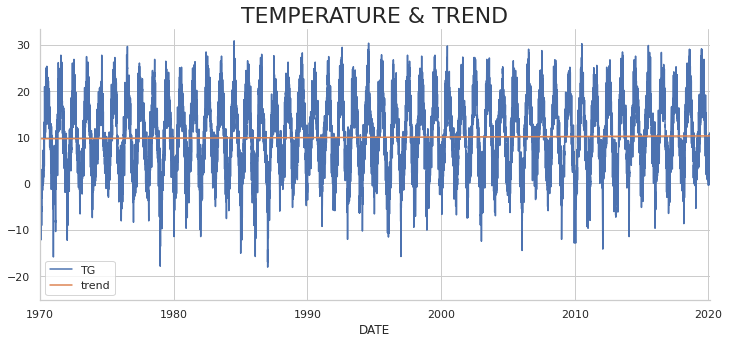

In [12]:
#plot the data
df[['TG', 'trend']].plot()
plt.xlim('1970-01-01'	, '2020-01-31')
plt.title("TEMPERATURE & TREND", fontsize=22)

sns.despine()

In [13]:
# df['month'] = df.index.month
# df.head()

In [14]:
seasonal_dummies = pd.get_dummies(df.index.month, prefix='month', drop_first=True).set_index(df.index)
seasonal_dummies

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,
1876-01-01,0,0,0,0,0,0,0,0,0,0,0
1876-01-02,0,0,0,0,0,0,0,0,0,0,0
1876-01-03,0,0,0,0,0,0,0,0,0,0,0
1876-01-04,0,0,0,0,0,0,0,0,0,0,0
1876-01-05,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-27,0,0,0,0,0,0,0,0,0,0,0
2022-01-28,0,0,0,0,0,0,0,0,0,0,0
2022-01-29,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# add dummy columns to our temperature dataframe

df = pd.concat([df, seasonal_dummies], axis=1)
df.head()

,TG,timestep,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,,,
1876-01-01,2.2,0,8.516047,0,0,0,0,0,0,0,0,0,0,0
1876-01-02,2.5,1,8.516080,0,0,0,0,0,0,0,0,0,0,0
1876-01-03,0.3,2,8.516114,0,0,0,0,0,0,0,0,0,0,0
1876-01-04,-5.8,3,8.516147,0,0,0,0,0,0,0,0,0,0,0
1876-01-05,-9.8,4,8.516180,0,0,0,0,0,0,0,0,0,0,0


In [16]:
# to model only seasonality

X=df.drop(columns=['TG', 'timestep', 'trend'])

In [17]:
m.fit(X, y)

LinearRegression()

In [18]:
df['seasonal'] = m.predict(X)

In [19]:
df['seasonal']

DATE
1876-01-01    0.068532
1876-01-02    0.068532
1876-01-03    0.068532
1876-01-04    0.068532
1876-01-05    0.068532
                ...   
2022-01-27    0.068532
2022-01-28    0.068532
2022-01-29    0.068532
2022-01-30    0.068532
2022-01-31    0.068532
Name: seasonal, Length: 53357, dtype: float64

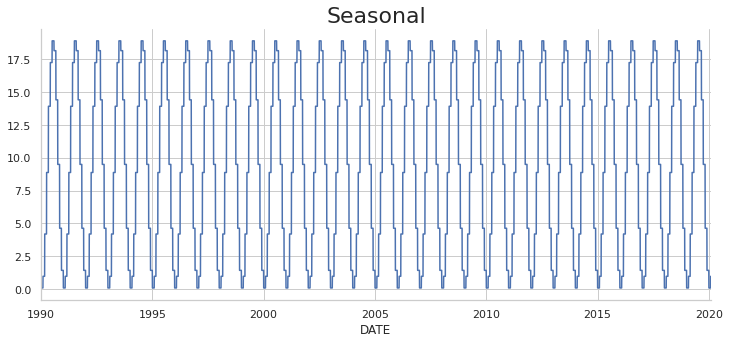

In [20]:
# plot only seasonality

df['seasonal'].plot()
plt.xlim('1990-01-01'	, '2020-01-31')
plt.title("Seasonal", fontsize=22)
sns.despine()

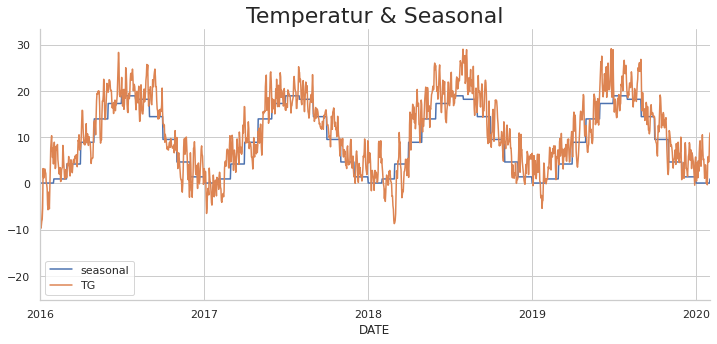

In [21]:
df[['seasonal', 'TG']].plot()
plt.xlim('2016-01-01'	, '2020-01-31')
plt.title("Temperatur & Seasonal", fontsize=22)
sns.despine()

### Model seasonality and trend

In [22]:
X=df.drop(columns=['TG', 'seasonal', 'trend'])
m.fit(X, y)
df['seasonal_trend'] = m.predict(X)

In [23]:
X.head()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,
1876-01-01,0,0,0,0,0,0,0,0,0,0,0,0
1876-01-02,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-03,2,0,0,0,0,0,0,0,0,0,0,0
1876-01-04,3,0,0,0,0,0,0,0,0,0,0,0
1876-01-05,4,0,0,0,0,0,0,0,0,0,0,0


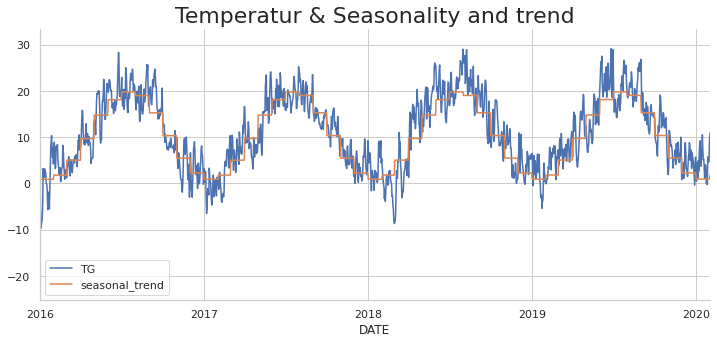

In [24]:
df[['TG', 'seasonal_trend']].plot()
plt.xlim('2016-01-01'	, '2020-01-31')
plt.title("Temperatur & Seasonality and trend", fontsize=22)
sns.despine()

### Extracting the remainder

In [25]:
df['remainder']=df['TG']-df['seasonal_trend']

(16801.0, 18292.0)

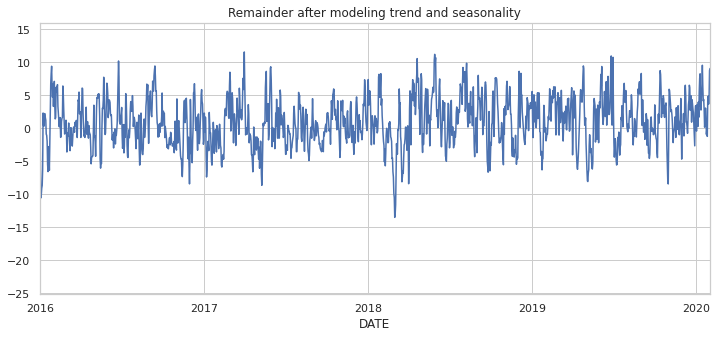

In [26]:
df['remainder'].plot(title = 'Remainder after modeling trend and seasonality')
plt.xlim('2016-01-01'	, '2020-01-31')

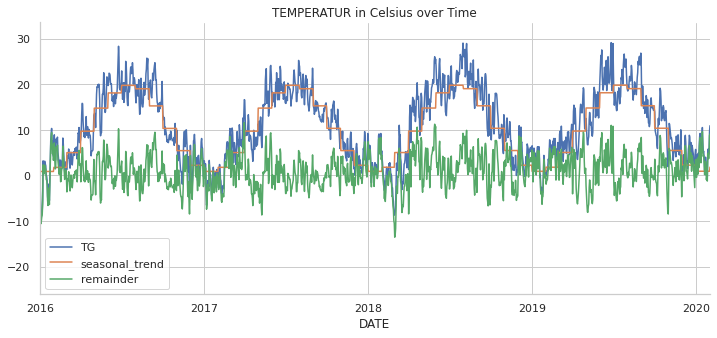

In [27]:
df[['TG', 'seasonal_trend', 'remainder']].plot(title='TEMPERATUR in Celsius over Time')
plt.xlim('2016-01-01'	, '2020-01-31')
sns.despine()

In [28]:
##Comparing REMAINDER to RANDOMNESS
random_array = np.random.normal(loc = 0, scale = 10, size = len(df))

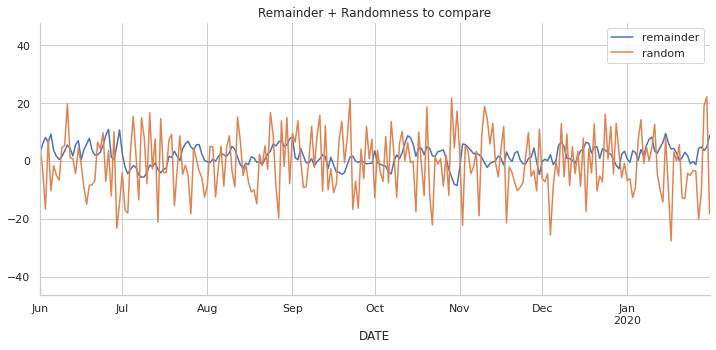

In [29]:
df['random'] = random_array
df[['remainder', 'random']].plot(title = 'Remainder + Randomness to compare')
plt.xlim('2019-06-01', '2020-01-31')

sns.despine()


In [30]:
df.head()

,TG,timestep,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,seasonal,seasonal_trend,remainder,random
DATE,,,,,,,,,,,,,,,,,,
1876-01-01,2.2,0,8.516047,0,0,0,0,0,0,0,0,0,0,0,0.068532,-0.812049,3.012049,-0.747040
1876-01-02,2.5,1,8.516080,0,0,0,0,0,0,0,0,0,0,0,0.068532,-0.812016,3.312016,0.436875
1876-01-03,0.3,2,8.516114,0,0,0,0,0,0,0,0,0,0,0,0.068532,-0.811983,1.111983,23.645559
1876-01-04,-5.8,3,8.516147,0,0,0,0,0,0,0,0,0,0,0,0.068532,-0.811950,-4.988050,9.369046
1876-01-05,-9.8,4,8.516180,0,0,0,0,0,0,0,0,0,0,0,0.068532,-0.811917,-8.988083,4.826618


* Decomposition with stats models

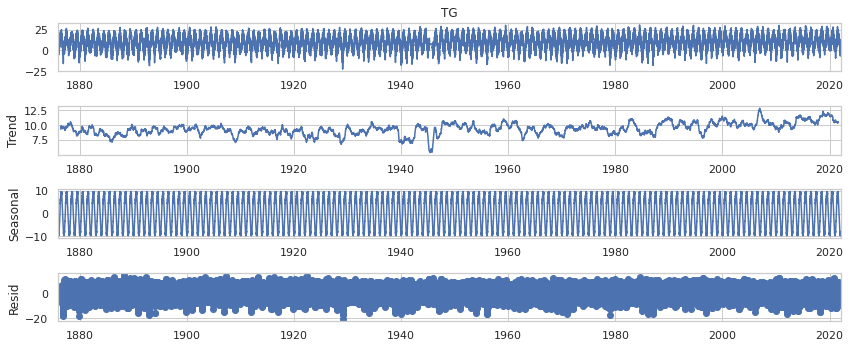

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd = seasonal_decompose(df['TG'], model='additive',period=365)

sd.plot()
None

In [32]:
df.to_csv('temperature_remainder.csv',index=True)

### AUTOREGRESSIVE MODEL

In [33]:
df = pd.read_csv('temperature_remainder.csv',index_col=0, parse_dates=True)
df.head()

,TG,timestep,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,seasonal,seasonal_trend,remainder,random
DATE,,,,,,,,,,,,,,,,,,
1876-01-01,2.2,0,8.516047,0,0,0,0,0,0,0,0,0,0,0,0.068532,-0.812049,3.012049,-0.747040
1876-01-02,2.5,1,8.516080,0,0,0,0,0,0,0,0,0,0,0,0.068532,-0.812016,3.312016,0.436875
1876-01-03,0.3,2,8.516114,0,0,0,0,0,0,0,0,0,0,0,0.068532,-0.811983,1.111983,23.645559
1876-01-04,-5.8,3,8.516147,0,0,0,0,0,0,0,0,0,0,0,0.068532,-0.811950,-4.988050,9.369046
1876-01-05,-9.8,4,8.516180,0,0,0,0,0,0,0,0,0,0,0,0.068532,-0.811917,-8.988083,4.826618


In [34]:
df_TG = df['TG']

In [35]:
df = df[['remainder']]
df.head()

,remainder
DATE,
1876-01-01,3.012049
1876-01-02,3.312016
1876-01-03,1.111983
1876-01-04,-4.988050
1876-01-05,-8.988083


(18048.0, 18292.0)

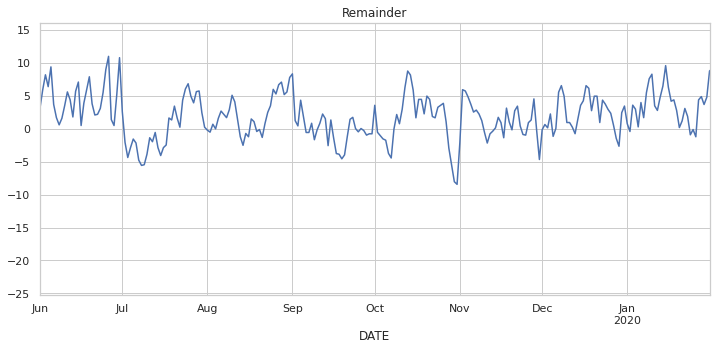

In [36]:
df['remainder'].plot(title='Remainder')
plt.xlim('2019-06-01', '2020-01-31')


In [37]:
df['lag1'] = df['remainder'].shift(1)
df.tail()

,remainder,lag1
DATE,,
2022-01-27,3.451005,1.951038
2022-01-28,3.950972,3.451005
2022-01-29,4.850939,3.950972
2022-01-30,4.850906,4.850939
2022-01-31,1.950873,4.850906


In [38]:
#correlation between the time lagged and original remainder
df[['remainder']].corrwith(df['lag1'])

remainder    0.804826
dtype: float64

<AxesSubplot:>

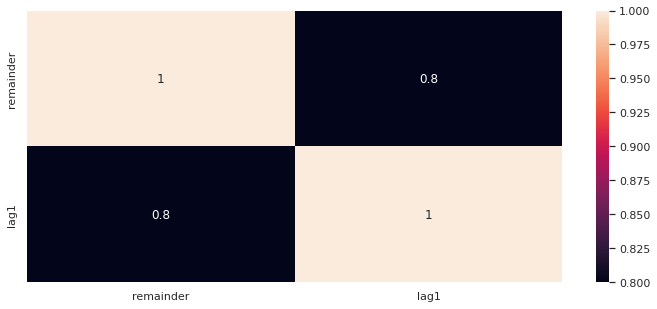

In [39]:
#heatmap
correlation = round(df.corr(), 2)
sns.heatmap(correlation, annot=True)

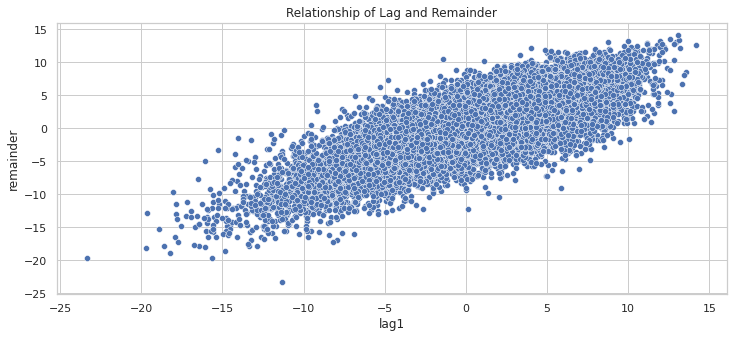

In [40]:
# Create a scatterplot
sns.scatterplot(x='lag1', y='remainder', data=df)
plt.title('Relationship of Lag and Remainder')
plt.show()

In [41]:
df.head()

,remainder,lag1
DATE,,
1876-01-01,3.012049,NaN
1876-01-02,3.312016,3.012049
1876-01-03,1.111983,3.312016
1876-01-04,-4.988050,1.111983
1876-01-05,-8.988083,-4.988050


In [42]:
# Dropping missing values
df.dropna(inplace=True)
df.head()

,remainder,lag1
DATE,,
1876-01-02,3.312016,3.012049
1876-01-03,1.111983,3.312016
1876-01-04,-4.988050,1.111983
1876-01-05,-8.988083,-4.988050
1876-01-06,-6.888116,-8.988083


In [43]:
df_TG = df_TG.drop('1876-01-01',axis=0)

In [44]:
# Assigning X and y
X = df[['lag1']]
y = df['remainder']

# Creating and fitting the model#
ar_model = LinearRegression()
ar_model.fit(X, y)

LinearRegression()

In [45]:
# Create predictions
df['ar_predictions'] = ar_model.predict(X)
df_ar_predictions = df['ar_predictions']


In [46]:
df.head()

,remainder,lag1,ar_predictions
DATE,,,
1876-01-02,3.312016,3.012049,2.424140
1876-01-03,1.111983,3.312016,2.665560
1876-01-04,-4.988050,1.111983,0.894923
1876-01-05,-8.988083,-4.988050,-4.014525
1876-01-06,-6.888116,-8.988083,-7.233844


(18048.0, 18292.0)

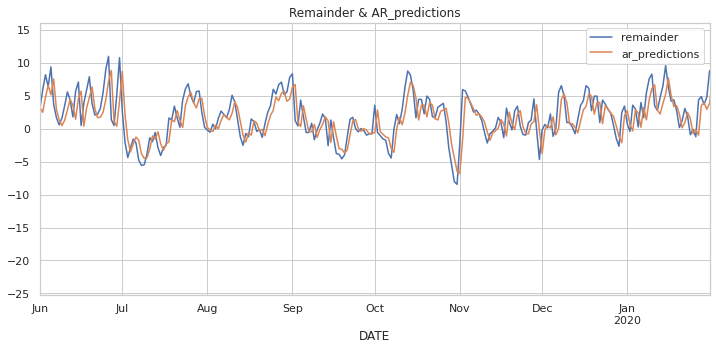

In [47]:
# Plot the original remainder and the prediction
df[['remainder','ar_predictions']].plot(title='Remainder & AR_predictions')
plt.xlim('2019-06-01', '2020-01-31')

(18048.0, 18292.0)

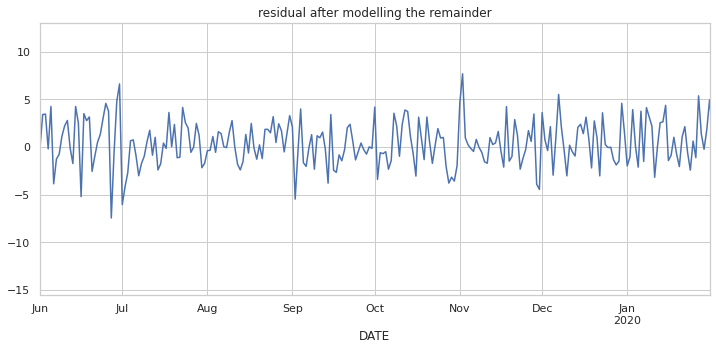

In [48]:
# Inspecting the residual after modelling the remainder
(df['remainder'] - df['ar_predictions']).plot(title='residual after modelling the remainder')
plt.xlim('2019-06-01', '2020-01-31')

In [49]:
#lag2
df['lag2'] = df.remainder.shift(2)
df.head()

,remainder,lag1,ar_predictions,lag2
DATE,,,,
1876-01-02,3.312016,3.012049,2.424140,NaN
1876-01-03,1.111983,3.312016,2.665560,NaN
1876-01-04,-4.988050,1.111983,0.894923,3.312016
1876-01-05,-8.988083,-4.988050,-4.014525,1.111983
1876-01-06,-6.888116,-8.988083,-7.233844,-4.988050


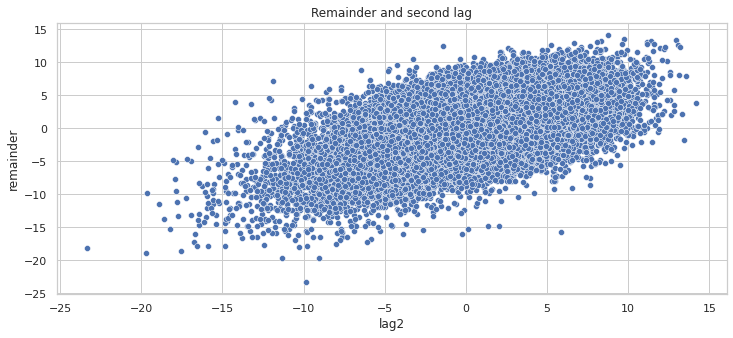

In [50]:
# Plot the second lag against the remainder
sns.scatterplot(x='lag2', y='remainder', data=df)
plt.title('Remainder and second lag')
plt.show()

<AxesSubplot:>

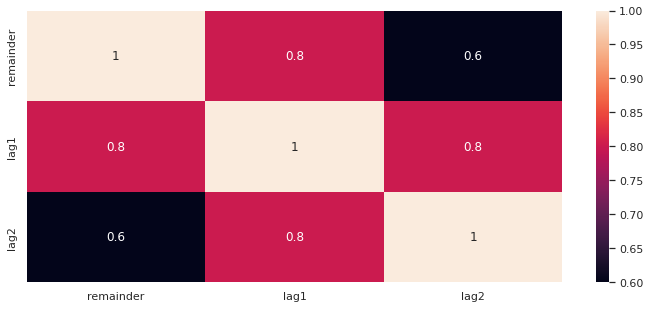

In [51]:
# Inspect correlations
correlations = round(df[['remainder', 'lag1', 'lag2']].corr(), 2)
sns.heatmap(correlations, annot=True)

Text(0, 0.5, 'Partial Autocorrelation')

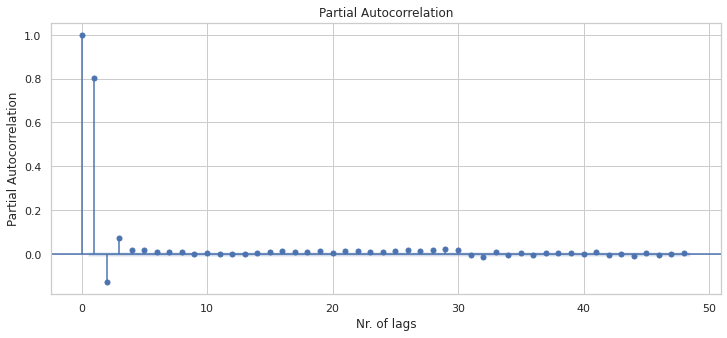

In [52]:
# plot partial autocorrelation function

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['remainder']);
plt.xlabel('Nr. of lags')
plt.ylabel('Partial Autocorrelation')

Text(0, 0.5, 'Partial Autocorrelation')

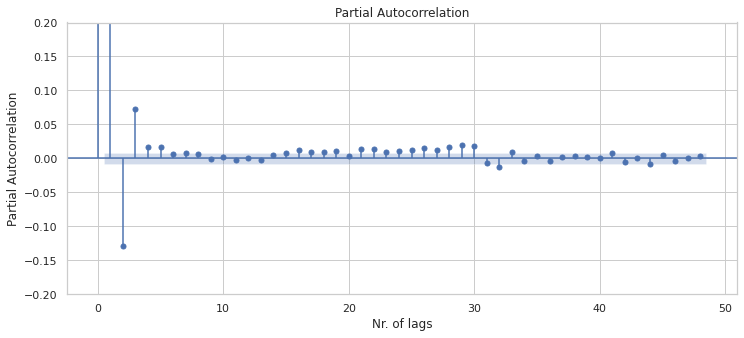

In [53]:
# plot partial autocorrelation function

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['remainder']);
plt.xlabel('Nr. of lags')
plt.ylim(-0.2,0.2)
plt.ylabel('Partial Autocorrelation')

# we can see thaat the first point is a remainder. and after the 5th lag we start going 
# inside the confidence interval


In [54]:
df['residuals_ar1'] = df['remainder'] - df['ar_predictions']
df.head()

,remainder,lag1,ar_predictions,lag2,residuals_ar1
DATE,,,,,
1876-01-02,3.312016,3.012049,2.424140,NaN,0.887876
1876-01-03,1.111983,3.312016,2.665560,NaN,-1.553577
1876-01-04,-4.988050,1.111983,0.894923,3.312016,-5.882973
1876-01-05,-8.988083,-4.988050,-4.014525,1.111983,-4.973558
1876-01-06,-6.888116,-8.988083,-7.233844,-4.988050,0.345729


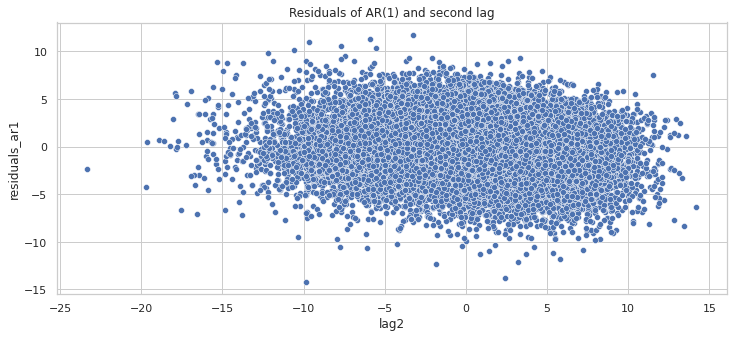

In [55]:
# Plot the second lag against the residual
sns.scatterplot(x='lag2', y='residuals_ar1', data=df)
plt.title('Residuals of AR(1) and second lag')
plt.show()

#we see the one  against the remainder is giving us better infos and correlation

In [56]:
df[['lag2']].corrwith(df['residuals_ar1'])

lag2   -0.076258
dtype: float64

###  Using SELECT_ORDER for determining the maximaluseful lags number

In [57]:
# Let ar_select_order select the number of lags for the remainder
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
selected_order = ar_select_order(df['remainder'], maxlag=12)

# ar_select_order iteratively fits and AR(1) model, then an AR(2) model, ..., finally an AR(maxlag) and returns the one that performs best
# The decision which model works best is based on an evaluation metric called AIC (Akaike Information Criterion)

# Inspect the number of lags chosen
selected_order.ar_lags # tells us between 1 and 5 lags is a good number

/home/mahmood/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/mahmood/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/mahmood/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


array([1, 2, 3, 4, 5])

### Comparing based on the MSE for different numbers of lags 

In [119]:
df = pd.read_csv('temperature_remainder.csv',index_col=0, parse_dates=True)
df.head(1)

,TG,timestep,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,seasonal,seasonal_trend,remainder,random
DATE,,,,,,,,,,,,,,,,,,
1876-01-01,2.2,0,8.516047,0,0,0,0,0,0,0,0,0,0,0,0.068532,-0.812049,3.012049,-0.74704


In [120]:
df = df.drop(['seasonal','random','trend','seasonal_trend'],axis=1)
df.head(1)
#teimesteps represent trend and months represent sesonality

,TG,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,remainder
DATE,,,,,,,,,,,,,,
1876-01-01,2.2,0,0,0,0,0,0,0,0,0,0,0,0,3.012049


In [121]:
# SELECT_ORDER suggested we shoud have 1 to 5 lags , lets calculate the MSE error for each lag

In [122]:
df_remainder=df['remainder']

In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Creating new columns with the 5 lags of temperature
for l in range(1,6):
    df['remainder']=df_remainder
    df[f'lag{l}_temperature'] =  df['remainder'].shift(l)
    df.dropna(inplace=True)
    df_remainder=df['remainder']
    df = df.drop(['remainder'],axis=1)

    # Assigning X and y
    X = df.drop(['TG'],axis=1)
    y = df_remainder
    # Creating and fitting the model
    ar_model = LinearRegression()
    ar_model.fit(X, y)

    # Create predictions
    df['last_ar_predictions'] = ar_model.predict(X)
    df_ar_predictions = df['last_ar_predictions']


    # Calculating MSE and ABS errors:
    error = mean_squared_error(df['TG'], df_ar_predictions)
    error_abs = mean_absolute_error(df['TG'], df_ar_predictions )
    
    print(f'Test MSE with lag{l}: ',  error)
    print(f'Test MAE with lag{l}: ',  error_abs)
    df= df.drop(['last_ar_predictions',f'lag{l}_temperature'],axis=1)


Test MSE with lag1:  139.79884915822973
Test MAE with lag1:  9.722285751970125
Test MSE with lag2:  144.29426162438398
Test MAE with lag2:  9.925468249840545
Test MSE with lag3:  146.5540475351879
Test MAE with lag3:  10.031695659391318
Test MSE with lag4:  147.78657748048423
Test MAE with lag4:  10.094449730157177
Test MSE with lag5:  148.53391453095952
Test MAE with lag5:  10.132670429841205


In [124]:
df.head(1)

,TG,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,,
1876-01-16,-2.3,15,0,0,0,0,0,0,0,0,0,0,0


### Adding the lags as features to our Temperature data 


From crossvalidation in aseparete step on train and test data we know the data is not overfitting.
 So We can calculate the ADF-Test to see if it is Stationary.

In [125]:
df = pd.read_csv('temperature_remainder.csv',index_col=0, parse_dates=True)
df = df.drop(['seasonal','random'],axis=1)
df.head(1)
#teimesteps represent trend and months represent sesonality

,TG,timestep,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,seasonal_trend,remainder
DATE,,,,,,,,,,,,,,,,
1876-01-01,2.2,0,8.516047,0,0,0,0,0,0,0,0,0,0,0,-0.812049,3.012049


Text(0, 0.5, 'Partial Autocorrelation')

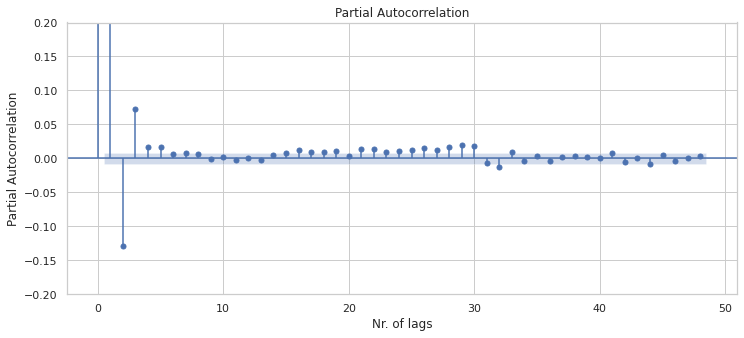

In [126]:
# plot partial autocorrelation function

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['remainder']);
plt.xlabel('Nr. of lags')
plt.ylim(-0.2,0.2)
plt.ylabel('Partial Autocorrelation')

# we can see thaat the first point is a remainder. and after the 5th lag we start going 
# inside the confidence interval

As we see in the confidency interval plot we can use 2 or 3 lags

In [127]:
# we picked 3 lags
for l in range(1,4):
    
    df[f'lag{l}_temperature'] =  df['remainder'].shift(l)
    df.dropna(inplace=True)

   
    

In [128]:
df.head(1)

,TG,timestep,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,seasonal_trend,remainder,lag1_temperature,lag2_temperature,lag3_temperature
DATE,,,,,,,,,,,,,,,,,,,
1876-01-07,-6.6,6,8.516246,0,0,0,0,0,0,0,0,0,0,0,-0.811851,-5.788149,-6.888116,-8.988083,-4.98805


In [129]:
#df = pd.read_csv('temperature_remainder.csv',index_col=0, parse_dates=True)
#df.head(1)

In [130]:
#def output(n):
   # ar_model = AutoReg(endog=df['remainder'], lags = n).fit()
   # return ar_model.summary()

In [131]:
#df = df.drop(['seasonal','random','remainder'],axis=1)
#df.head()

In [132]:
# Training a "full" model including the autoregressive part
X_full = df.drop(columns=['TG', 'seasonal_trend','trend','remainder'])
y_full = df.TG

m_full = LinearRegression()
m_full.fit(X_full, y_full)

LinearRegression()

In [133]:
# Make predictions using the full model
df['pred_full'] = m_full.predict(X_full)

(18048.0, 18292.0)

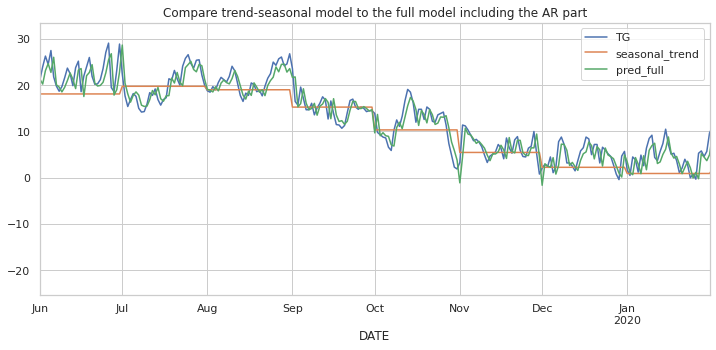

In [134]:
df[['TG', 'seasonal_trend', 'pred_full']].plot(title='Compare trend-seasonal model to the full model including the AR part')
plt.xlim('2019-06-01', '2020-01-31')

**The analysis about how many lags to include into the model has to be done using the remainder**. This is because the remainder is stripped of the influence of trend and seasonality. But in order to build the actual model, we can use the lag of the actual temperature data.

In [135]:
# Build the same model using statsmodels
statsmodels_ar = AutoReg(df['TG'], lags=5, trend='ct', seasonal=True).fit()

(18048.0, 18292.0)

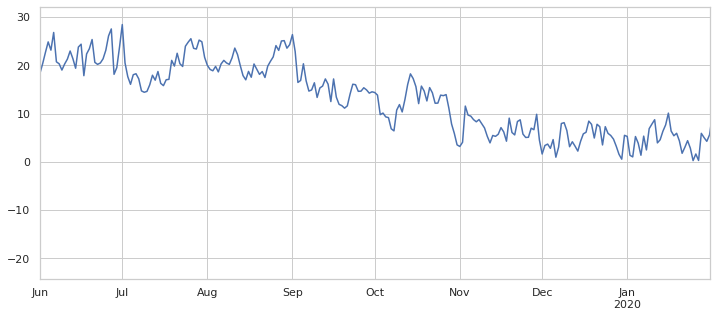

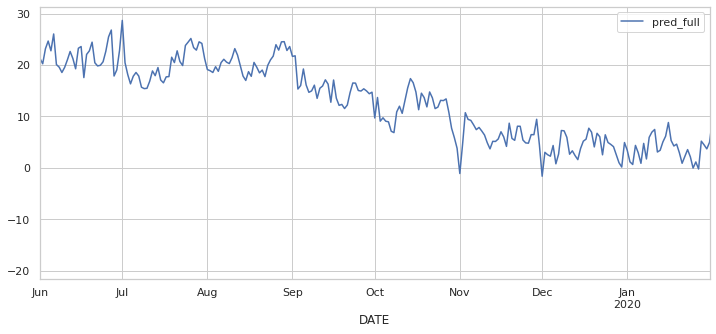

In [136]:
statsmodels_ar.predict().plot()
plt.xlim('2019-06-01', '2020-01-31')
df[['pred_full']].plot()
plt.xlim('2019-06-01', '2020-01-31')

#### Augmented Dickey-Fuller Test


In [137]:
import statsmodels
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa import stattools

from warnings import filterwarnings

In [139]:
y = df['TG']
statsmodels.tsa.stattools.adfuller(df['TG'])

#Adf is larger than 

(-20.41409855279487,
 0.0,
 58,
 53292,
 {'1%': -3.4304727128839145,
  '5%': -2.861594236648337,
  '10%': -2.566798868361285},
 239864.29632890556)

In [140]:
def print_adf(data):
    
    """ Prints the results of the augmented Dickey Fuller Test"""
    
    adf_stats, p, used_lag, n_obs, levels, information_criterion = \
            statsmodels.tsa.stattools.adfuller(data)
    
    print(f"""   
            adf: {round(adf_stats,2)}
            p: {p} 
            used lag: {3} 
            number of observations: {n_obs}
            {round(levels['1%'],2)} (p=1; CI=99%) 
            {round(levels['5%'],2)} (p=5; CI=95%)
            {round(levels['10%'],2)} (p=10 CI=90%) 
            information criterion (AIC): {information_criterion}
            """)

In [141]:
print_adf(y) # The adf prediction on a daily interval  shows the data is stationary

   
            adf: -20.41
            p: 0.0 
            used lag: 3 
            number of observations: 53292
            -3.43 (p=1; CI=99%) 
            -2.86 (p=5; CI=95%)
            -2.57 (p=10 CI=90%) 
            information criterion (AIC): 239864.29632890556
            


### Calculating AIC to choose a Model:

In [142]:
def output(n):
    ar_model = AutoReg(endog=df['remainder'], lags = n).fit()
    return ar_model.summary()

In [143]:
output(1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                53351
Model:                     AutoReg(1)   Log Likelihood             -121438.958
Method:               Conditional MLE   S.D. of innovations              2.357
Date:                Fri, 25 Feb 2022   AIC                              1.715
Time:                        12:08:06   BIC                              1.715
Sample:                    01-08-1876   HQIC                             1.715
                         - 01-31-2022                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0002      0.010      0.018      0.985      -0.020       0.020
remainder.L1     0.8048      0.003    313.207      0.000       0.800       0.810
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2425           +0.0000j            1.2425            0.0000
-----------------------------------------------------------------------------
"""

In [144]:
output(2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                53351
Model:                     AutoReg(2)   Log Likelihood             -120992.571
Method:               Conditional MLE   S.D. of innovations              2.337
Date:                Fri, 25 Feb 2022   AIC                              1.698
Time:                        12:08:06   BIC                              1.699
Sample:                    01-09-1876   HQIC                             1.698
                         - 01-31-2022                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0002      0.010      0.023      0.982      -0.020       0.020
remainder.L1     0.9081      0.004    211.509      0.000       0.900       0.917
remainder.L2    -0.1284      0.004    -29.909      0.000      -0.137      -0.120
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3644           +0.0000j            1.3644            0.0000
AR.2            5.7075           +0.0000j            5.7075            0.0000
-----------------------------------------------------------------------------
"""

In [145]:
output(3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                53351
Model:                     AutoReg(3)   Log Likelihood             -120846.875
Method:               Conditional MLE   S.D. of innovations              2.331
Date:                Fri, 25 Feb 2022   AIC                              1.693
Time:                        12:08:07   BIC                              1.694
Sample:                    01-10-1876   HQIC                             1.693
                         - 01-31-2022                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0003      0.010      0.034      0.973      -0.019       0.020
remainder.L1     0.9174      0.004    212.467      0.000       0.909       0.926
remainder.L2    -0.1944      0.006    -33.485      0.000      -0.206      -0.183
remainder.L3     0.0727      0.004     16.837      0.000       0.064       0.081
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2694           -0.0000j            1.2694           -0.0000
AR.2            0.7025           -3.2159j            3.2918           -0.2158
AR.3            0.7025           +3.2159j            3.2918            0.2158
-----------------------------------------------------------------------------
"""

In [146]:
# We can choose a model AR(2) based on AIC value.

### ARIMA Model

In [6]:
df = pd.read_csv('temperature_remainder.csv',index_col=0, parse_dates=True)
df = df.drop(['random','seasonal','trend'],axis=1)
df.head(1)

,TG,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,seasonal_trend,remainder
DATE,,,,,,,,,,,,,,,
1876-01-01,2.2,0,0,0,0,0,0,0,0,0,0,0,0,-0.812049,3.012049


In [7]:
from statsmodels.tsa.arima.model import ARIMA

In [8]:
# import warnings
# from math import sqrt
# def evaluate_models(values, p_values, d_values, q_values):
# 	best_score, best_cfg = float("inf"), None
# 	for p in p_values:
# 		for d in d_values:
# 			for q in q_values:
# 				order = (p,d,q)
# 				arima_model = ARIMA(df['remainder'], order=(q, d, q)).fit()
			    
# 				try:
# 					rmse = sqrt(mean_squared_error(df['TG'], arima_model.predict()))
# 					if rmse < best_score:
# 						best_score, best_cfg = rmse, order
# 					print('ARIMA%s RMSE=%.3f' % (order,rmse))
# 				except:
# 					continue
# 	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# # evaluate parameters
# p_values = [0, 1, 2,3]
# d_values = [0,1,2]
# q_values = [0,1,2,3]
# values= df['remainder']
# warnings.filterwarnings("ignore")
# evaluate_models(values, p_values, d_values, q_values)


In [9]:
df = pd.read_csv('temperature_remainder.csv',index_col=0, parse_dates=True)
df = df.drop(['random','seasonal','trend'],axis=1)
df.head(1)

,TG,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,seasonal_trend,remainder
DATE,,,,,,,,,,,,,,,
1876-01-01,2.2,0,0,0,0,0,0,0,0,0,0,0,0,-0.812049,3.012049


In [10]:
arima_model = ARIMA(df['remainder'], order=(2, 1, 2)).fit()

/home/mahmood/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/mahmood/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/mahmood/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [11]:
df['arima_prediction'] = arima_model.predict()

(18048.0, 18292.0)

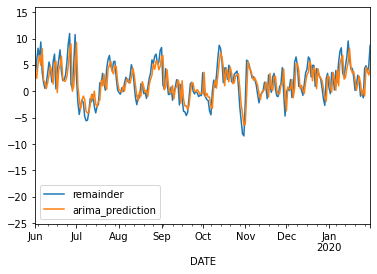

In [12]:
df[['remainder','arima_prediction']].plot()
plt.xlim('2019-06-01', '2020-01-31')

In [13]:
df['full_prediction_arima'] = df['seasonal_trend'] + df['arima_prediction']

(18048.0, 18292.0)

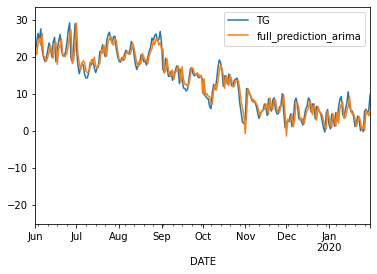

In [14]:
df[['TG', 'full_prediction_arima']].plot()
plt.xlim('2019-06-01', '2020-01-31')

In [15]:
# we picked 3 lags
for l in range(1,3):
    
    df[f'lag{l}_temperature'] =  df['remainder'].shift(l)
    df.dropna(inplace=True)

In [16]:
df.head(2)

,TG,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,seasonal_trend,remainder,arima_prediction,full_prediction_arima,lag1_temperature,lag2_temperature
DATE,,,,,,,,,,,,,,,,,,,
1876-01-04,-5.8,3,0,0,0,0,0,0,0,0,0,0,0,-0.811950,-4.988050,1.009181,0.197231,1.111983,3.312016
1876-01-05,-9.8,4,0,0,0,0,0,0,0,0,0,0,0,-0.811917,-8.988083,-4.740713,-5.552631,-4.988050,1.111983


In [17]:
### Generating prediction for a future time

In [43]:
#print(df.index.max()[0:3])
# import datetime
# date = df.index.max()

# # convert datetime to timestamp
# date = datetime.datetime.timestamp(date)
# date
# from datetime import datetime
# shortDate = datetime.today().strftime('%Y-%m-%d')
# shortDate
2022-02-27 + 0000-00-01

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (2387465312.py, line 11)

df.index.max()

In [20]:
df = df.drop(['arima_prediction'],axis=1)
df.tail()

,TG,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,seasonal_trend,remainder,full_prediction_arima,lag1_temperature,lag2_temperature
DATE,,,,,,,,,,,,,,,,,,
2022-01-27,4.4,53352,0,0,0,0,0,0,0,0,0,0,0,0.948995,3.451005,2.545454,1.951038,3.051072
2022-01-28,4.9,53353,0,0,0,0,0,0,0,0,0,0,0,0.949028,3.950972,4.053438,3.451005,1.951038
2022-01-29,5.8,53354,0,0,0,0,0,0,0,0,0,0,0,0.949061,4.850939,4.191125,3.950972,3.451005
2022-01-30,5.8,53355,0,0,0,0,0,0,0,0,0,0,0,0.949094,4.850906,5.044090,4.850939,3.950972
2022-01-31,2.9,53356,0,0,0,0,0,0,0,0,0,0,0,0.949127,1.950873,4.871938,4.850906,4.850939


In [21]:
# training the model on the whole dataset
X_combined = df.drop(columns=['TG', 'seasonal_trend', 'remainder', 'full_prediction_arima'])
y_combined = df['TG']

m_full_combined = LinearRegression()
m_full_combined.fit(X_combined, y_combined)

LinearRegression()

In [22]:
# so we need to generate features for the time point 2022-02-01

X_future = []

timestep = df['timestep'].max() + 1
months = [1] + [0]*3 + [0]*7   #dummy code for February
lag_1 = df.loc['2022-01-31', 'remainder'] # taking the last remainder 
lag_2 = df.loc['2022-01-30', 'remainder'] # taking the last remainder 


In [23]:
df.tail()

,TG,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,seasonal_trend,remainder,full_prediction_arima,lag1_temperature,lag2_temperature
DATE,,,,,,,,,,,,,,,,,,
2022-01-27,4.4,53352,0,0,0,0,0,0,0,0,0,0,0,0.948995,3.451005,2.545454,1.951038,3.051072
2022-01-28,4.9,53353,0,0,0,0,0,0,0,0,0,0,0,0.949028,3.950972,4.053438,3.451005,1.951038
2022-01-29,5.8,53354,0,0,0,0,0,0,0,0,0,0,0,0.949061,4.850939,4.191125,3.950972,3.451005
2022-01-30,5.8,53355,0,0,0,0,0,0,0,0,0,0,0,0.949094,4.850906,5.044090,4.850939,3.950972
2022-01-31,2.9,53356,0,0,0,0,0,0,0,0,0,0,0,0.949127,1.950873,4.871938,4.850906,4.850939


In [24]:
X_future.append(timestep)
X_future.extend(months)
X_future.append(lag_1)
X_future.append(lag_2)

In [25]:
df.tail()

,TG,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,seasonal_trend,remainder,full_prediction_arima,lag1_temperature,lag2_temperature
DATE,,,,,,,,,,,,,,,,,,
2022-01-27,4.4,53352,0,0,0,0,0,0,0,0,0,0,0,0.948995,3.451005,2.545454,1.951038,3.051072
2022-01-28,4.9,53353,0,0,0,0,0,0,0,0,0,0,0,0.949028,3.950972,4.053438,3.451005,1.951038
2022-01-29,5.8,53354,0,0,0,0,0,0,0,0,0,0,0,0.949061,4.850939,4.191125,3.950972,3.451005
2022-01-30,5.8,53355,0,0,0,0,0,0,0,0,0,0,0,0.949094,4.850906,5.044090,4.850939,3.950972
2022-01-31,2.9,53356,0,0,0,0,0,0,0,0,0,0,0,0.949127,1.950873,4.871938,4.850906,4.850939


In [26]:
X_future


[53357, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.9508734553568765, 4.850906463373947]

In [27]:
X_combined.columns

Index(['timestep', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'lag1_temperature', 'lag2_temperature'],
      dtype='object')

In [28]:
X_future = pd.DataFrame([X_future])
X_future.columns = X_combined.columns

X_future

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1_temperature,lag2_temperature
0,53357,1,0,0,0,0,0,0,0,0,0,0,1.950873,4.850906


In [29]:
print("Prediction for 2022-02-01 is {}".format(m_full_combined.predict(X_future)[0]))

Prediction for 2022-02-01 is 3.025593013039579


In [30]:
m_full_combined.coef_

array([ 3.30159043e-05,  9.05424085e-01,  4.12553753e+00,  8.78850252e+00,
        1.38392413e+01,  1.71436654e+01,  1.88206098e+01,  1.80368744e+01,
        1.43190619e+01,  9.39235537e+00,  4.54561442e+00,  1.33238366e+00,
        9.08171605e-01, -1.28348003e-01])